In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline
from itertools import product
from sklearn.metrics import r2_score
import csv
from vmd import VMD

In [2]:
# adjusted R-squared
def r2_score_adjusted(y, y_pred, featurecount):
    n = len(y)
    return 1 - (1-r2_score(y, y_pred)) * (n-1)/(n-featurecount-1)

# AIC
def calculate_aic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    aic = n * np.log(sse / n) + 2 * k
    return aic

# BIC
def calculate_bic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    bic = n * np.log(sse / n) + k * np.log(n)
    return bic

# импорт временного ряда

In [3]:
# linux path
path1 = './'
path2 = '/'

# windows path
# path1 = '.\\'
# path2 = '\\'

In [4]:
index = list()
TS = list()
Seasonal1 = list()
# Seasonal2 = list()

for i in range(100):
    data = pd.read_csv(f"{path1}Cases{path2}t{i}_s1{i}_s2{i}_n{i}.csv", decimal=',')
    df = pd.DataFrame(data['Combined'], dtype=float)
    TS.append(df.T.values[0])

    df = pd.DataFrame(data['Seasonal1'], dtype=float)
    Seasonal1.append(df.T.values[0])

    # df = pd.DataFrame(data['Seasonal2'], dtype=float)
    # Seasonal2.append(df.T.values[0])

index = df.index

In [5]:
best_metriks = list()

with open(f"{path1}Results{path2}Best_Metriks-Season-1.csv", 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        row['R2'] = np.float64(row['R2'])
        row['R2_Adj'] = np.float64(row['R2_Adj'])
        row['AIC'] = np.float64(row['AIC'])
        row['BIC'] = np.float64(row['BIC'])
        best_metriks.append(row)
best_metriks

[{'Time Series': 'TS1',
  'R2': np.float64(-0.0),
  'R2_Adj': np.float64(-0.00402),
  'AIC': np.float64(11533.20474),
  'BIC': np.float64(11565.08406)},
 {'Time Series': 'TS2',
  'R2': np.float64(-0.00063),
  'R2_Adj': np.float64(-0.00465),
  'AIC': np.float64(14113.60306),
  'BIC': np.float64(14145.48239)},
 {'Time Series': 'TS3',
  'R2': np.float64(0.49541),
  'R2_Adj': np.float64(0.49338),
  'AIC': np.float64(9283.69842),
  'BIC': np.float64(9315.57775)},
 {'Time Series': 'TS4',
  'R2': np.float64(0.9915),
  'R2_Adj': np.float64(0.99146),
  'AIC': np.float64(4004.96085),
  'BIC': np.float64(4036.84017)},
 {'Time Series': 'TS5',
  'R2': np.float64(-0.0),
  'R2_Adj': np.float64(-0.00402),
  'AIC': np.float64(12830.61753),
  'BIC': np.float64(12862.49685)},
 {'Time Series': 'TS6',
  'R2': np.float64(0.99892),
  'R2_Adj': np.float64(0.99892),
  'AIC': np.float64(1591.88934),
  'BIC': np.float64(1623.76866)},
 {'Time Series': 'TS7',
  'R2': np.float64(0.76255),
  'R2_Adj': np.float64(0.7

In [6]:
data = []
with open(f"{path1}Results{path2}Parameters-Season-1.csv", 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

best_r2_params = [data[i] for i in range(len(data)) if (data[i]['Metric'] == 'R2')]
best_r2_adj_params = [data[i] for i in range(len(data)) if (data[i]['Metric'] == 'R2_Adj')]
best_aic_params = [data[i] for i in range(len(data)) if (data[i]['Metric'] == 'AIC')]
best_bic_params = [data[i] for i in range(len(data)) if (data[i]['Metric'] == 'BIC')]

In [89]:
np.shape(best_bic_params)

(100,)

In [7]:
best_bic_params

[{'Time Series': 'TS1',
  'Metric': 'BIC',
  'alpha': '0',
  'init': '0',
  'IMFs': '3 - 3'},
 {'Time Series': 'TS2',
  'Metric': 'BIC',
  'alpha': '0',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS3',
  'Metric': 'BIC',
  'alpha': '50000',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS4',
  'Metric': 'BIC',
  'alpha': '50000',
  'init': '1',
  'IMFs': '2 - 9'},
 {'Time Series': 'TS5',
  'Metric': 'BIC',
  'alpha': '0',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS6',
  'Metric': 'BIC',
  'alpha': '5000',
  'init': '0',
  'IMFs': '2 - 10'},
 {'Time Series': 'TS7',
  'Metric': 'BIC',
  'alpha': '15000',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS8',
  'Metric': 'BIC',
  'alpha': '1000',
  'init': '2',
  'IMFs': '2 - 10'},
 {'Time Series': 'TS9',
  'Metric': 'BIC',
  'alpha': '0',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS10',
  'Metric': 'BIC',
  'alpha': '0',
  'init': '0',
  'IMFs': '2 - 2'},
 {'Time Series': 'TS11',
  'Metric': 'B

# тестовый анализ

In [98]:
alpha = 0
init = 0
DC = True
K = 10
tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

u, u_hat, omega = VMD(TS[0], alpha, tau, K, DC, init, tol)

featurecount = 6

c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:71: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\SSA-VMD-Research\some_samples\vmd.py:68: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)


Text(0.5, 0, 'X')

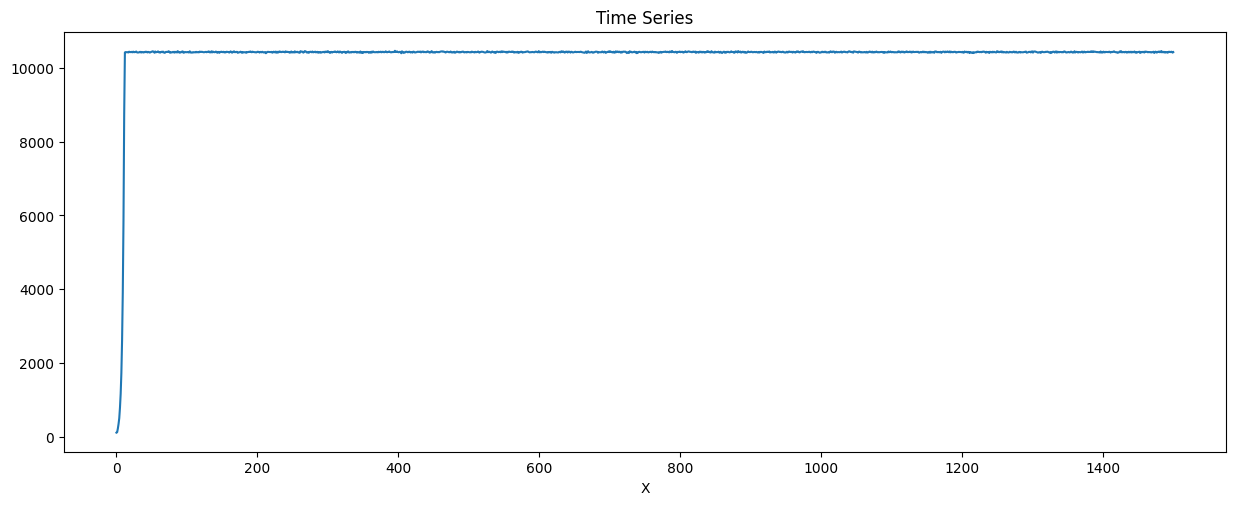

In [99]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, TS[0])
plt.title('Time Series')
plt.xlabel('X')

Text(0.5, 0, 'X')

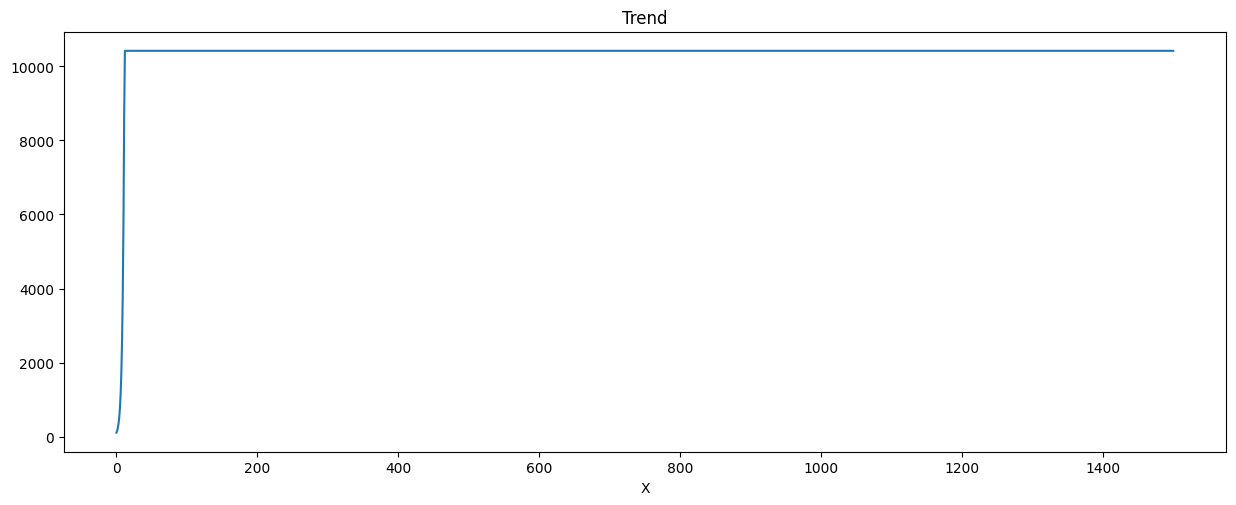

In [100]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, Trend[0])
plt.title('Trend')
plt.xlabel('X')

In [101]:
featurecount

6

In [105]:
r2_score(Trend[0], u[0].T)

0.999842135192068

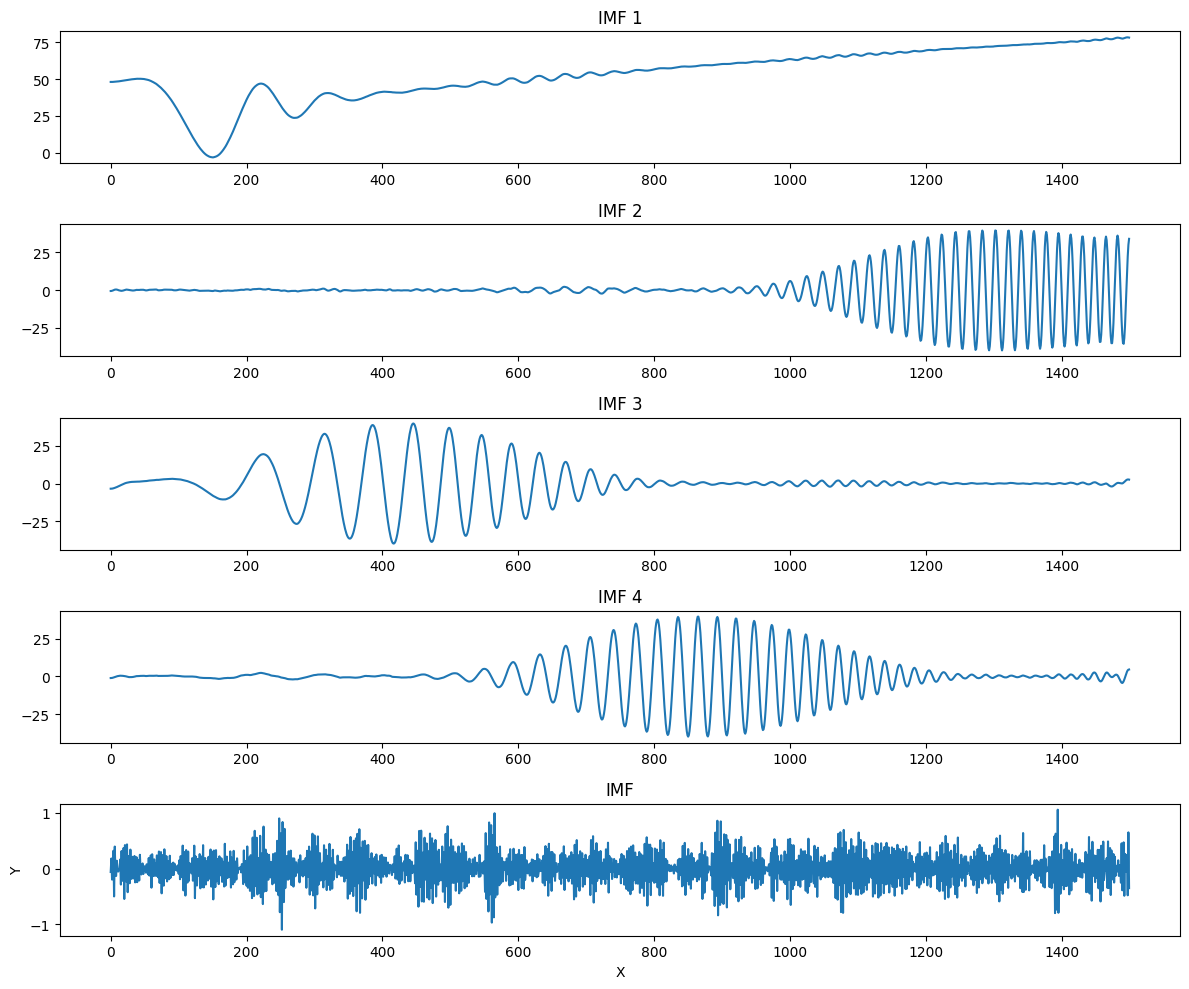

In [14]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range(K):
    axs[i].plot(index[0], u[i].T)
    axs[i].set_title(f'IMF {i+1}')

plt.title('IMF')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

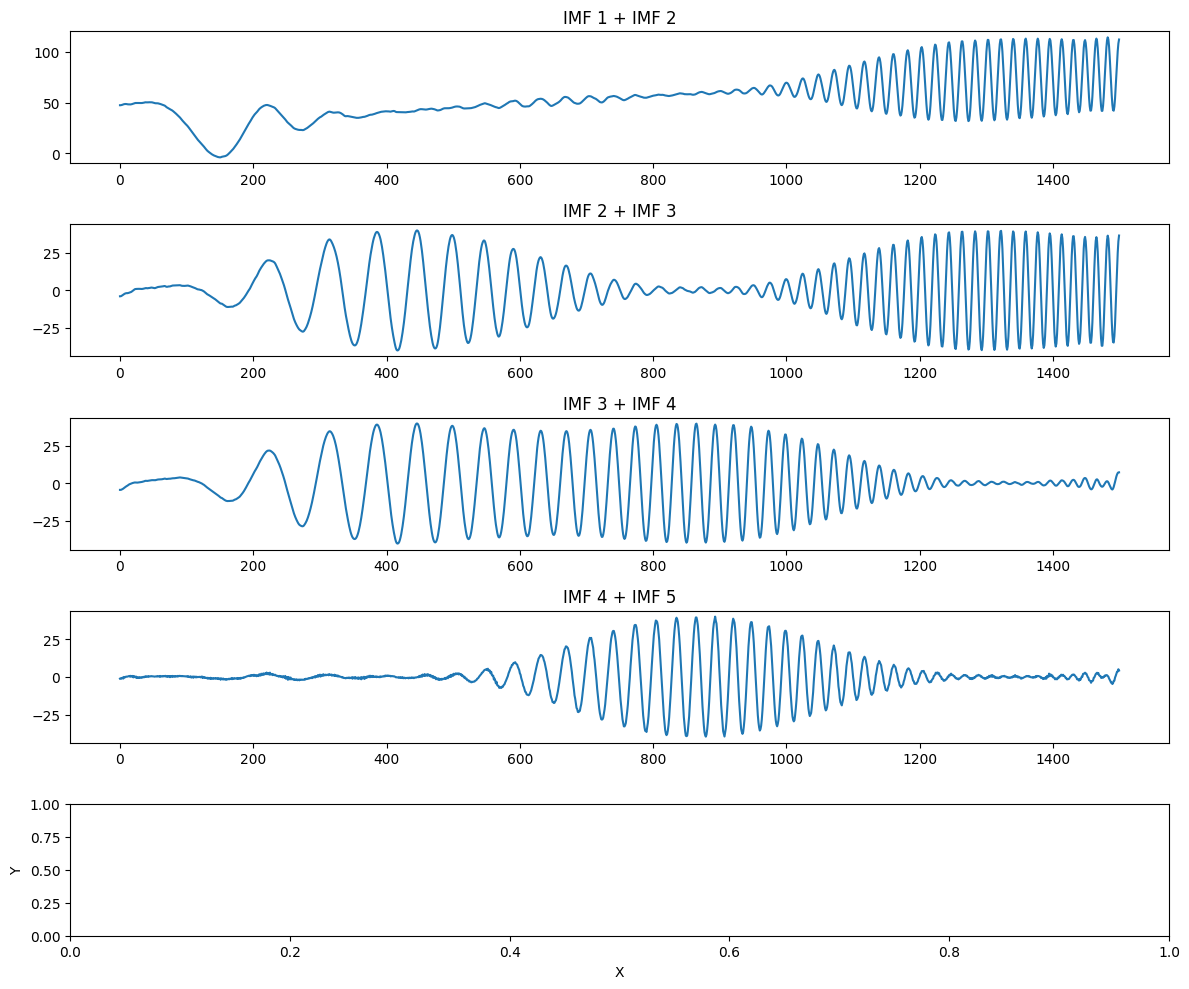

In [ ]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K-1)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range((K-1)):
    axs[i].plot(index[0], u[i].T + u[i+1].T)
    axs[i].set_title(f'IMF {i+1} + IMF {i+2}')

# plt.title('IMF')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

# декомпозиция временного ряда

In [8]:
alpha = (1, 50, 100, 300, 1500, 3500, 6000, 8000, 12500, 17500, 22500, 27500, 32500, 37500, 42500, 47500)
init = (0, 1, 2)
DC = True
K = 10

tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

featurecount = 6

range_of_imfs = range(1,K)

In [9]:
# для всех TS
for ts_i in range(len(TS)):

    # для всех наборов параметров
    for params_set in list(product(alpha, init)):
        u, u_hat, omega = VMD(f=TS[ts_i], alpha=params_set[0], tau=tau, K=K, DC=DC, init=params_set[1], tol=tol)
        # best_params = [{"Time Series": f"t{ts_i+1}" ,"alpha": params_set[0], "tau": tau, "K": params_set[1], "DC": params_set[2], "init": params_set[3], "tol": tol}]
        
        sum_of_imfs = 0
        for i_imfs in range_of_imfs:

            sum_of_imfs += u[i_imfs].T

            pair_of_sum = [sum_of_imfs + u[0].T, sum_of_imfs]
            first_imf = np.argmax([r2_score(Seasonal1[ts_i], pair_of_sum[0]), r2_score(Seasonal1[ts_i], pair_of_sum[1])])

            r2 = r2_score(Seasonal1[ts_i], pair_of_sum[first_imf])
            r2_adj = r2_score_adjusted(Seasonal1[ts_i], pair_of_sum[first_imf], featurecount)
            aic = calculate_aic(Seasonal1[ts_i], pair_of_sum[first_imf], featurecount)
            bic = calculate_bic(Seasonal1[ts_i], pair_of_sum[first_imf], featurecount)
            

            if (r2 > best_metriks[ts_i]["R2"]):
                best_metriks[ts_i]["R2"] = r2

                best_r2_params[ts_i]["alpha"] = params_set[0]
                best_r2_params[ts_i]["init"] = params_set[1]
                best_r2_params[ts_i]["IMFs"] = f'{first_imf+1} - {i_imfs+1}'

            if (r2_adj > best_metriks[ts_i]["R2_Adj"]):
                best_metriks[ts_i]["R2_Adj"] = r2_adj

                best_r2_adj_params[ts_i]["alpha"] = params_set[0]
                best_r2_adj_params[ts_i]["init"] = params_set[1]
                best_r2_adj_params[ts_i]["IMFs"] = f'{first_imf+1} - {i_imfs+1}'

            if (aic < best_metriks[ts_i]["AIC"]):
                best_metriks[ts_i]["AIC"] = aic

                best_aic_params[ts_i]["alpha"] = params_set[0]
                best_aic_params[ts_i]["init"] = params_set[1]
                best_aic_params[ts_i]["IMFs"] = f'{first_imf+1} - {i_imfs+1}'

            if (bic < best_metriks[ts_i]["BIC"]):
                best_metriks[ts_i]["BIC"] = bic

                best_bic_params[ts_i]["alpha"] = params_set[0]
                best_bic_params[ts_i]["init"] = params_set[1]
                best_bic_params[ts_i]["IMFs"] = f'{first_imf+1} - {i_imfs+1}'


# метрики точности и параметры с выводом

In [14]:
for ts_i in range(len(TS)):
    best_metriks[ts_i]["BIC"] = format(best_metriks[ts_i]["BIC"], ".5f")
    best_metriks[ts_i]["AIC"] = format(best_metriks[ts_i]["AIC"], ".5f")
    best_metriks[ts_i]["R2_Adj"] = format(best_metriks[ts_i]["R2_Adj"], ".5f")
    best_metriks[ts_i]["R2"] = format(best_metriks[ts_i]["R2"], ".5f")

In [15]:
filename=f"{path1}Results{path2}Best_Metriks-Season-1(2).csv"

fields = best_metriks[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_metriks[ts_i]])  # Write data rows

In [16]:
filename = f"{path1}Results{path2}Parameters-Season-1(2).csv"

fields = best_r2_params[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_r2_params[ts_i]])  # Write data rows
        writer.writerows([best_r2_adj_params[ts_i]])  # Write data rows
        writer.writerows([best_aic_params[ts_i]])  # Write data rows
        writer.writerows([best_bic_params[ts_i]])  # Write data rows

# улучшение декомпозиций

In [13]:
first_imfs = 2
for ts_i in range(len(TS)):
    best_metriks[ts_i]["BIC"] = float(best_metriks[ts_i]["BIC"])
    best_metriks[ts_i]["AIC"] = float(best_metriks[ts_i]["AIC"])
    best_metriks[ts_i]["R2_Adj"] = float(best_metriks[ts_i]["R2_Adj"])
    best_metriks[ts_i]["R2"] = float(best_metriks[ts_i]["R2"])

# для всех TS
for ts_i in range(len(TS)):
    while ((best_metriks[ts_i]["R2"] < 0.5) and (first_imfs < K)):
        range_of_imfs = range(first_imfs, K)
        
        # для всех наборов параметров
        for params_set in list(product(alpha, init)):
            u, u_hat, omega = VMD(f=TS[ts_i], alpha=params_set[0], tau=tau, K=K, DC=DC, init=params_set[1], tol=tol)
            # best_params = [{"Time Series": f"t{ts_i+1}" ,"alpha": params_set[0], "tau": tau, "K": params_set[1], "DC": params_set[2], "init": params_set[3], "tol": tol}]
            
            sum_of_imfs = 0
            for i_imfs in range_of_imfs:

                sum_of_imfs += u[i_imfs].T

                r2 = r2_score(Seasonal1[ts_i], sum_of_imfs)
                r2_adj = r2_score_adjusted(Seasonal1[ts_i], sum_of_imfs, featurecount)
                aic = calculate_aic(Seasonal1[ts_i], sum_of_imfs, featurecount)
                bic = calculate_bic(Seasonal1[ts_i], sum_of_imfs, featurecount)
                

                if (r2 > best_metriks[ts_i]["R2"]):
                    best_metriks[ts_i]["R2"] = r2

                    best_r2_params[ts_i]["alpha"] = params_set[0]
                    best_r2_params[ts_i]["init"] = params_set[1]
                    best_r2_params[ts_i]["IMFs"] = f'{first_imfs+1} - {i_imfs+1}'

                if (r2_adj > best_metriks[ts_i]["R2_Adj"]):
                    best_metriks[ts_i]["R2_Adj"] = r2_adj

                    best_r2_adj_params[ts_i]["alpha"] = params_set[0]
                    best_r2_adj_params[ts_i]["init"] = params_set[1]
                    best_r2_adj_params[ts_i]["IMFs"] = f'{first_imfs+1} - {i_imfs+1}'

                if (aic < best_metriks[ts_i]["AIC"]):
                    best_metriks[ts_i]["AIC"] = aic

                    best_aic_params[ts_i]["alpha"] = params_set[0]
                    best_aic_params[ts_i]["init"] = params_set[1]
                    best_aic_params[ts_i]["IMFs"] = f'{first_imfs+1} - {i_imfs+1}'

                if (bic < best_metriks[ts_i]["BIC"]):
                    best_metriks[ts_i]["BIC"] = bic

                    best_bic_params[ts_i]["alpha"] = params_set[0]
                    best_bic_params[ts_i]["init"] = params_set[1]
                    best_bic_params[ts_i]["IMFs"] = f'{first_imfs+1} - {i_imfs+1}'

        first_imfs += 1